In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline 

# Wholesale Customers Analysis

## Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
# Importing data from CSV
wholesale = pd.read_csv('Wholesale Customer.csv')

## Descriptive Analytics
-----

In [3]:
# Check if data is imported right
wholesale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
# Check for the first 10 entries in the data
wholesale.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [5]:
# Getting the number of rows and columns
wholesale.shape

(440, 9)

In [6]:
# Getting the overall information of the dataset
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
# The five number summary
wholesale.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
wholesale.describe(include='object').T

,count,unique,top,freq
Channel,440,2,Hotel,298
Region,440,3,Other,316


In [9]:
# Finding the unique values in channel
wholesale['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [10]:
# Finding the unique values in region
wholesale['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20e22050>,
      dtype=object)

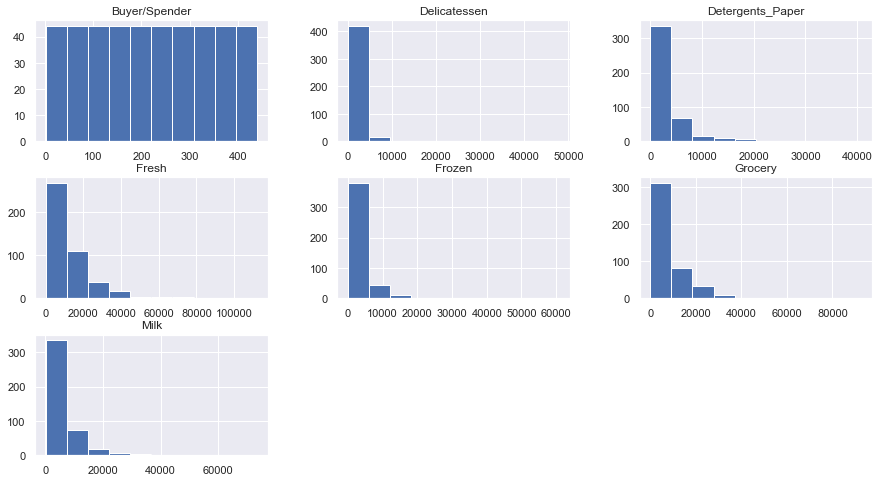

In [11]:
# Plotting the histogram to view the distribution of data
wholesale.hist(figsize=(15,8))

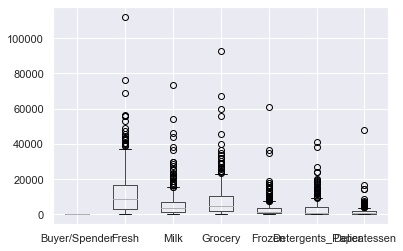

In [12]:
# To plot a box plot and find the approx distribution and outliers
wholesale.boxplot()

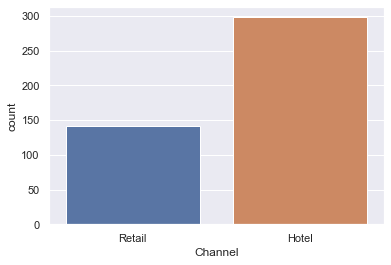

In [13]:
# Distribution of stores between the two channels
sns.countplot(wholesale['Channel'])

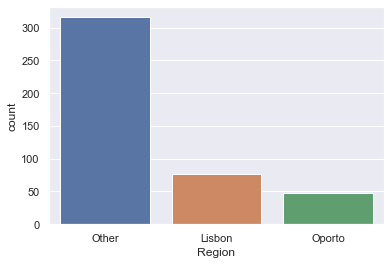

In [14]:
# Distribution of stores between the three regions
sns.countplot(wholesale['Region'])

Text(0.5, 1.0, 'The region wise and channel wise count of stores')

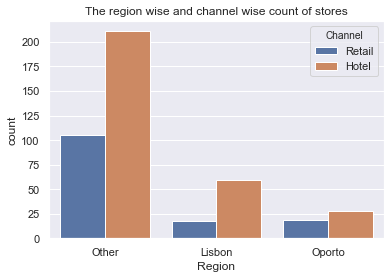

In [15]:
# Getting the count for each region and channel
sns.countplot(wholesale['Region'],hue=wholesale['Channel'])
plt.title('The region wise and channel wise count of stores')

# -------------------------------------------------------------------------------------------
### Question 1:

Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [16]:
# Summing up all item's row wise and storing under a new column 'Total_Spend'
wholesale['Total_Spend'] = wholesale[wholesale.columns[3:]].sum(axis=1)

In [17]:
# To provide the numerical data for Region
region = wholesale[['Region','Total_Spend']].groupby('Region').sum() 
region

,Total_Spend
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


Text(0, 0.5, 'Spends (x10^7)')

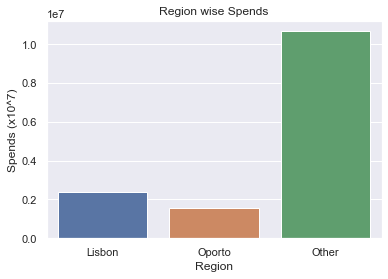

In [18]:
# Plotting region wise Total Spend
sns.barplot(region.index,region['Total_Spend'])
plt.title('Region wise Spends')
plt.ylabel('Spends (x10^7)')

In [19]:
# To provide the numerical data for Channel
channel = wholesale[['Channel','Total_Spend']].groupby('Channel').sum()
channel

,Total_Spend
Channel,
Hotel,7999569
Retail,6619931


Text(0, 0.5, 'Spends')

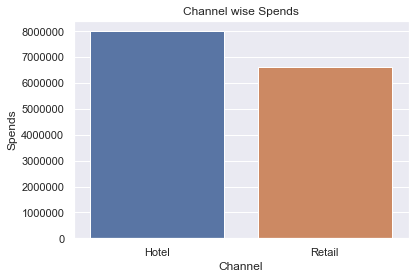

In [20]:
# Plotting channel wise Total Spend
sns.barplot(channel.index,channel['Total_Spend'])
plt.title('Channel wise Spends')
plt.ylabel('Spends')

# -------------------------------------------------------------------------------------------
### Question 2:

There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

Text(0, 0.5, 'Spends')

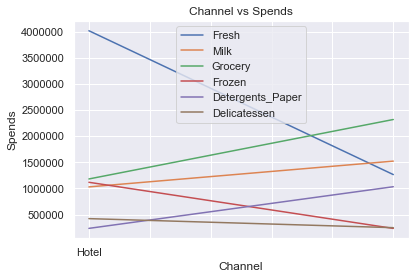

In [21]:
# To view the overall trends of each variety across channels
wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Channel').sum().plot()
plt.title('Channel vs Spends')
plt.xlabel('Channel')
plt.ylabel('Spends')

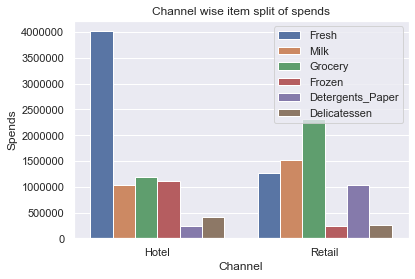

In [22]:
# To view the overall trends of each variety across channels
df_channel = pd.DataFrame(wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Channel').sum().T.unstack().reset_index())
sns.barplot(x = df_channel['Channel'], y= df_channel[0], hue=df_channel['level_1'])
plt.title('Channel wise item split of spends')
plt.ylabel('Spends')
plt.legend()

Text(0, 0.5, 'Spends')

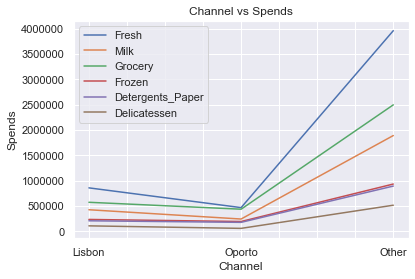

In [23]:
# To view the overall trends of each variety across channels
wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Region').sum().plot()
plt.title('Channel vs Spends')
plt.xlabel('Channel')
plt.ylabel('Spends')

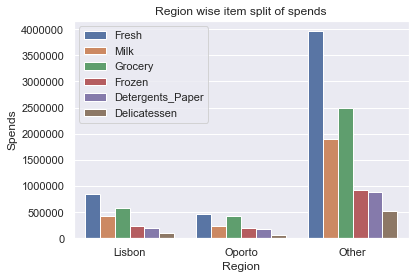

In [24]:
# To view the overall trends of each variety across channels
df_region = pd.DataFrame(wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Region').sum().T.unstack().reset_index())
sns.barplot(x = df_region['Region'], y= df_region[0], hue=df_region['level_1'])
plt.title('Region wise item split of spends')
plt.ylabel('Spends')
plt.legend()

Text(0, 0.5, 'Spends')

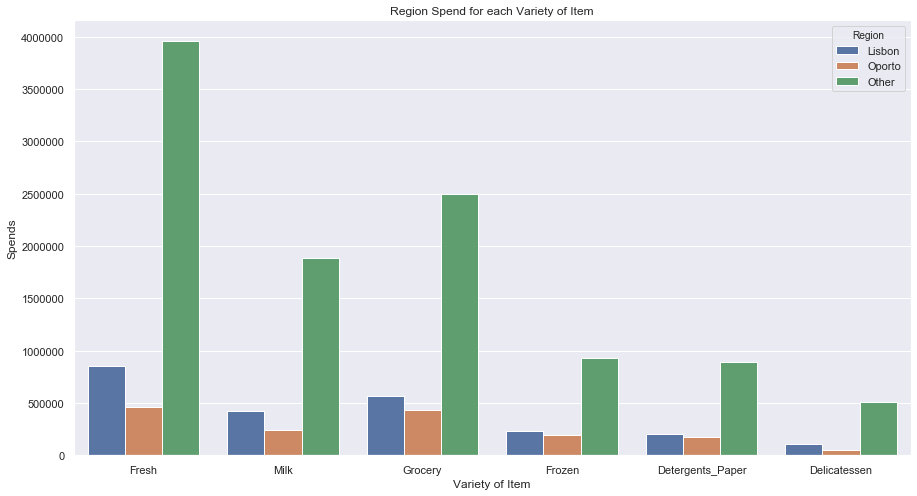

In [25]:
# To find the total spends in each region, across all the varieties
x1 = wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Region').sum().T
x1 = pd.DataFrame(x1.unstack())
x1.reset_index(inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(data=x1, x='level_1',hue='Region',y=0, estimator=sum)
plt.title('Region Spend for each Variety of Item')
plt.xlabel('Variety of Item')
plt.ylabel('Spends')

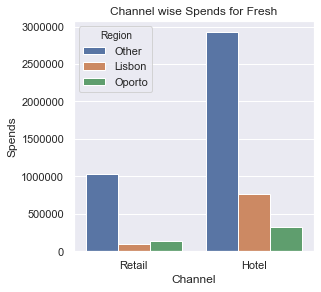

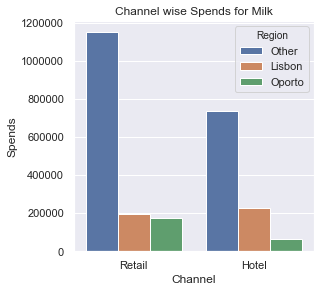

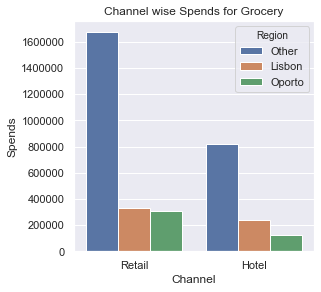

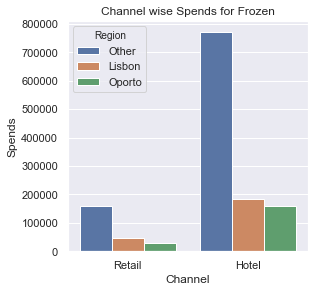

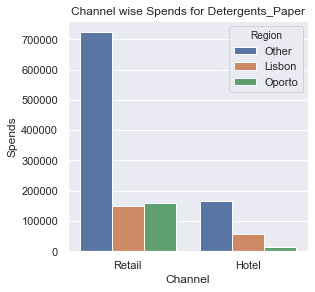

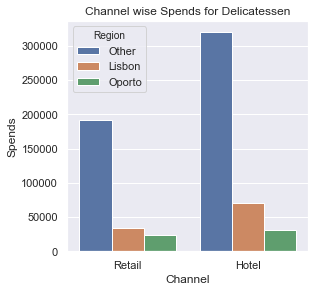

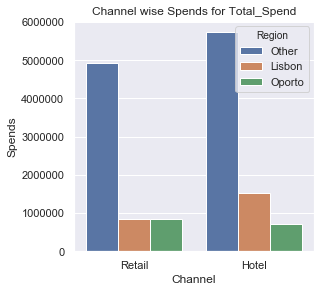

In [26]:
# Channelwise spends for each variety
counter = 1
count = len(wholesale.columns)
for i in wholesale.columns[1:]:
    if wholesale[i].dtypes == 'int64':
        plt.figure(figsize=(25,50))
        plt.subplot(count,5,counter)
        sns.barplot(wholesale['Channel'],wholesale[i],hue=wholesale['Region'], estimator=sum,ci=None)
        plt.title('Channel wise Spends for %s' %i)
        plt.ylabel('Spends')
        counter += 1

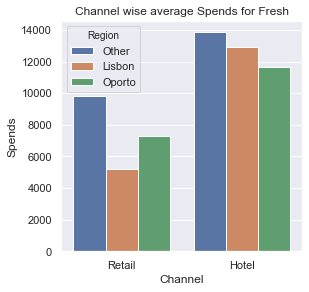

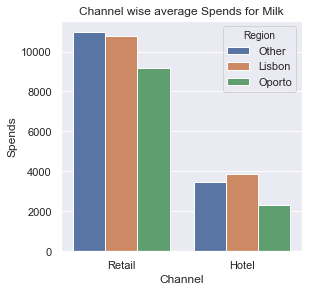

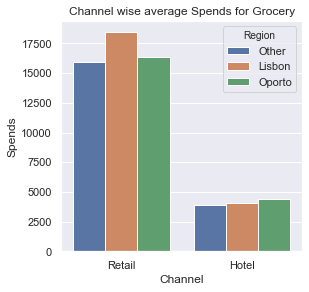

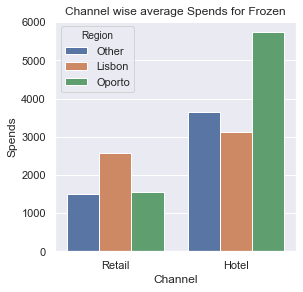

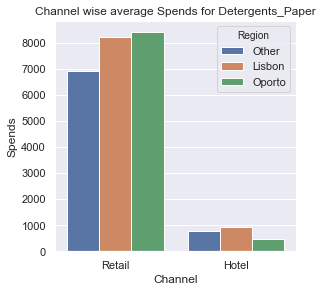

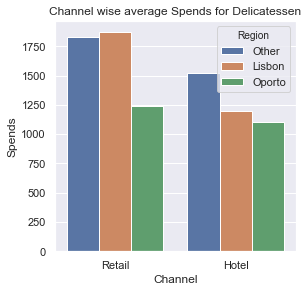

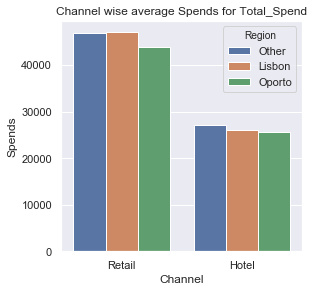

In [27]:
# Channelwise average spends for each variety
counter = 1
count = len(wholesale.columns)
for i in wholesale.columns[1:]:
    if wholesale[i].dtypes == 'int64':
        plt.figure(figsize=(25,50))
        plt.subplot(count,5,counter)
        sns.barplot(wholesale['Channel'],wholesale[i],hue=wholesale['Region'],ci=None)
        plt.title('Channel wise average Spends for %s' %i)
        plt.ylabel('Spends')
        counter += 1

Text(0, 0.5, 'Spends')

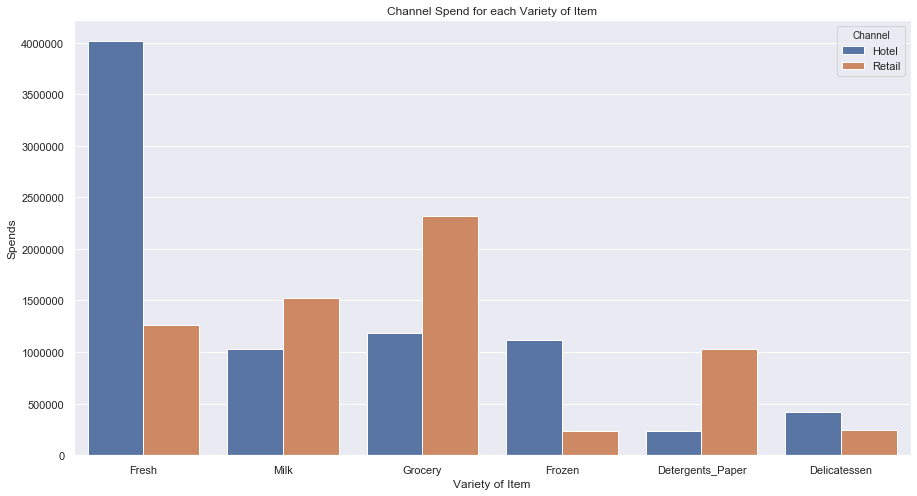

In [28]:
# To find the total spends in each channel, across all the varieties
x2 = wholesale.drop(columns=['Total_Spend','Buyer/Spender']).groupby('Channel').sum().T
x2 = pd.DataFrame(x2.unstack())
x2.reset_index(inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(data=x2, x='level_1',hue='Channel',y=0, estimator=sum)
plt.title('Channel Spend for each Variety of Item')
plt.xlabel('Variety of Item')
plt.ylabel('Spends')

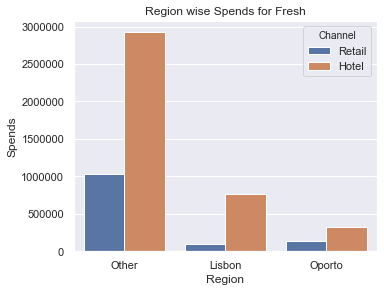

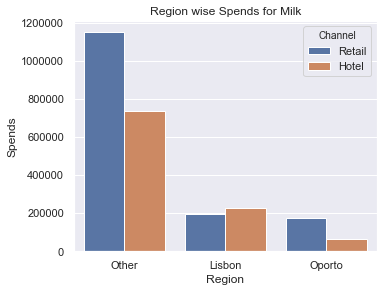

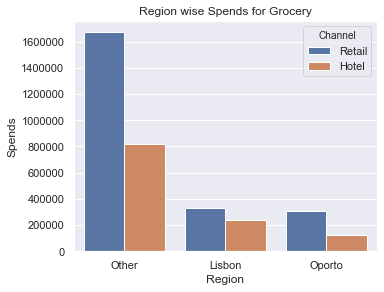

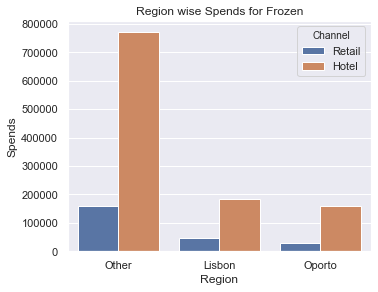

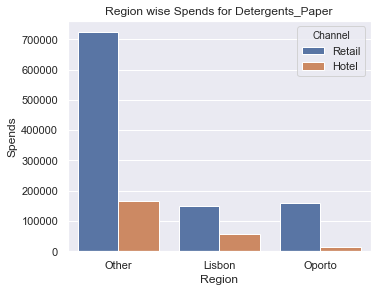

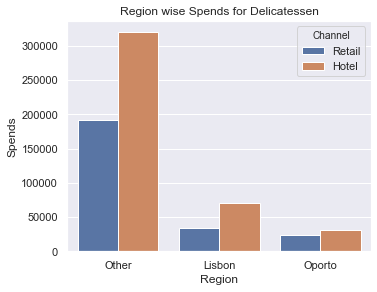

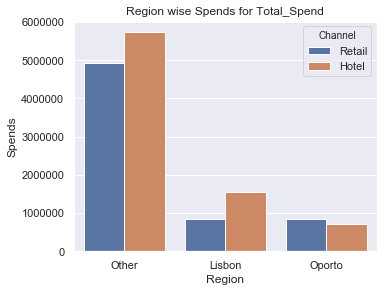

In [29]:
# Regionwise spends for each variety
counter = 1
count = len(wholesale.columns)
for i in wholesale.columns[1:]:
    if wholesale[i].dtypes == 'int64':
        plt.figure(figsize=(25,50))
        plt.subplot(count,4,counter)
        sns.barplot(wholesale['Region'],wholesale[i],hue=wholesale['Channel'], estimator=sum, ci=None)
        plt.title('Region wise Spends for %s' %i)
        plt.ylabel('Spends')
        counter += 1

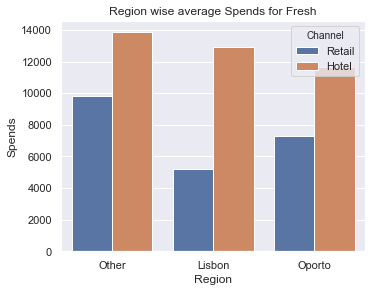

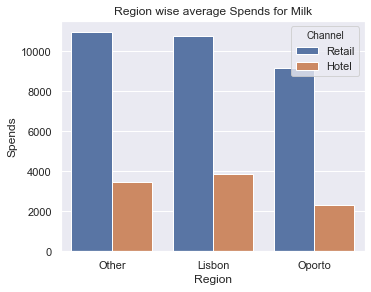

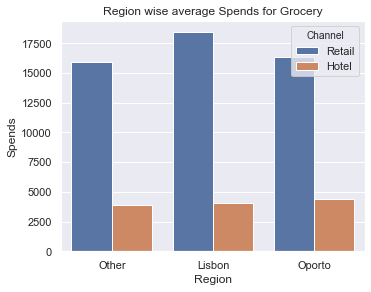

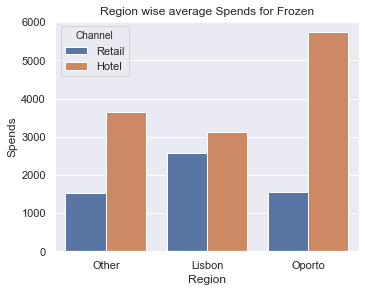

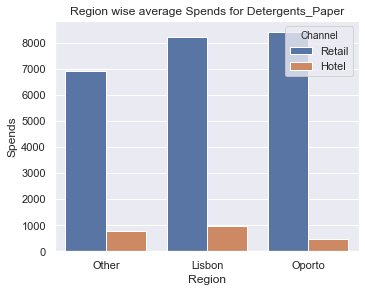

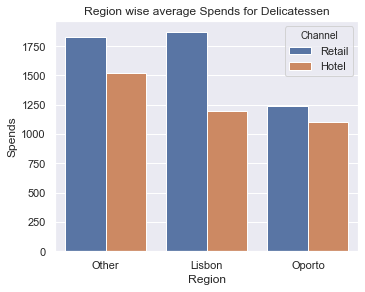

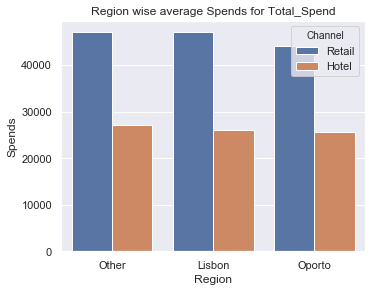

In [30]:
# Regionwise average spends for each variety
counter = 1
count = len(wholesale.columns)
for i in wholesale.columns[1:]:
    if wholesale[i].dtypes == 'int64':
        plt.figure(figsize=(25,50))
        plt.subplot(count,4,counter)
        sns.barplot(wholesale['Region'],wholesale[i],hue=wholesale['Channel'], ci=None)
        plt.title('Region wise average Spends for %s' %i)
        plt.ylabel('Spends')
        counter += 1

# ------------------------------------------------------------------------------------------
### Question 3:

There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [31]:
# Calculating the Inter Quartile Range (IQR) and the Coefficient of Variation
desc = wholesale.describe().T.drop(index=['Buyer/Spender','Total_Spend'], axis=0)
desc['Range'] = desc['75%'] - desc['25%']
desc['Coeff_Var'] = (desc['std']/desc['mean'])*100
desc

,count,mean,std,min,25%,50%,75%,max,Range,Coeff_Var
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.00,105.391792
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25,127.329858
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,8502.75,119.517437
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00,158.033238
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25,165.464714
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00,184.940690


,Range,Coeff_Var
Fresh,13806.00,105.391792
Milk,5657.25,127.329858
Grocery,8502.75,119.517437
Frozen,2812.00,158.033238
Detergents_Paper,3665.25,165.464714
Delicatessen,1412.00,184.940690


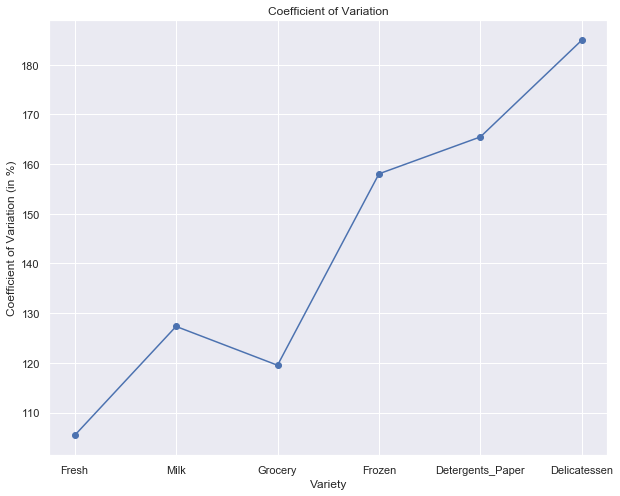

In [32]:
# Plotting the CV for each varity of item
plt.figure(figsize=(10,8))
plt.plot(desc.index, desc['Coeff_Var'],'o-')
plt.title('Coefficient of Variation')
plt.xlabel('Variety')
plt.ylabel('Coefficient of Variation (in %)')
desc[['Range','Coeff_Var']]

# -------------------------------------------------------------------------------------------
### Question 4:

Are there any outliers in the data?

Text(0, 0.5, 'Spends')

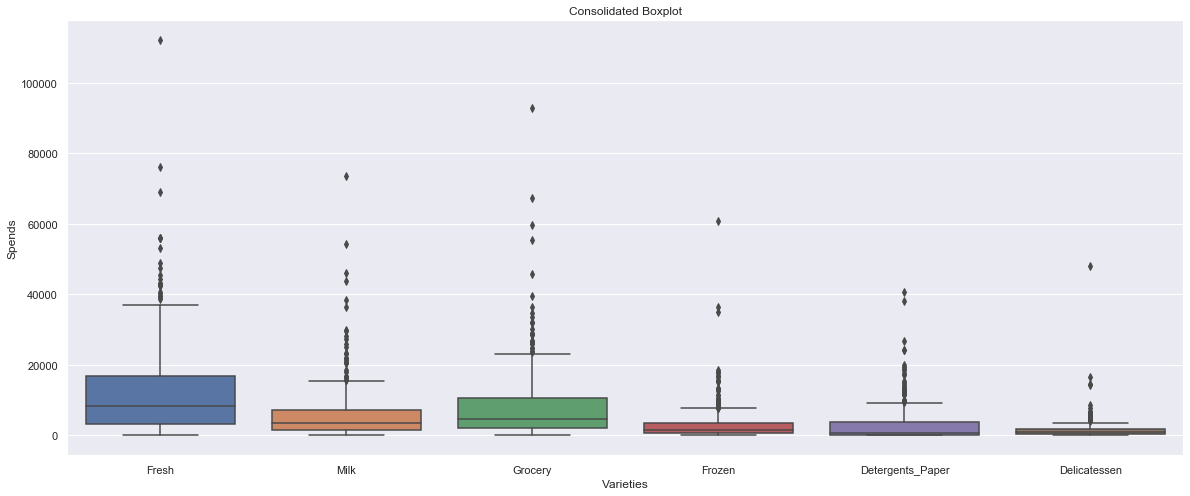

In [48]:
# To plot the box plots for all the varieties to observe the presence of any outliers
df=wholesale.drop(columns=['Buyer/Spender','Channel','Region','Total_Spend'])
plt.figure(figsize=(20,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title('Consolidated Boxplot')
plt.xlabel('Varieties')
plt.ylabel('Spends')

In [34]:
# Calculating the number of outliers in each variety
Q1 = wholesale.quantile(0.25)
Q3 = wholesale.quantile(0.75)
IQR = desc['Range']
outliers = wholesale[(wholesale < (Q1 - 1.5 * IQR)) |(wholesale > (Q3 + 1.5 * IQR))]
outliers.dropna(how='all').count()

Buyer/Spender        0
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicatessen        27
Total_Spend          0
dtype: int64

# -------------------------------------------------------------------------------------------